In [1]:
import os
import pandas as pd
import nibabel as nib

def count_voxels(file_path):
    # Load the NIfTI file
    img = nib.load(file_path)
    # Get the data array
    data = img.get_fdata()
    # Count the number of non-zero voxels
    voxel_count = (data > 0).sum()
    return voxel_count

def process_nii_files(folder_path):
    # Initialize an empty list to store file names and voxel counts
    data = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            file_path = os.path.join(folder_path, filename)
            voxel_count = count_voxels(file_path)
            data.append({'Filename': filename, 'Voxel Count': voxel_count})

    # Create a DataFrame from the data
    df = pd.DataFrame(data)
    return df

# Example usage
folder_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr"
df = process_nii_files(folder_path)
print(df)


                      Filename  Voxel Count
0     4716872_2018_11_29_L.nii     62346630
1     4716872_2018_11_29_R.nii     57576745
2     4722136_2019_10_31_L.nii     58522726
3     4722136_2019_10_31_R.nii     59112513
4      474881_2014_09_25_L.nii     62672552
..                         ...          ...
370  66700362_2023_07_03_R.nii     60983401
371  66700404_2023_08_26_L.nii     55677680
372  66700404_2023_08_26_R.nii     58674793
373  66700681_2023_11_16_L.nii     59871841
374  66700681_2023_11_16_R.nii     57644380

[375 rows x 2 columns]


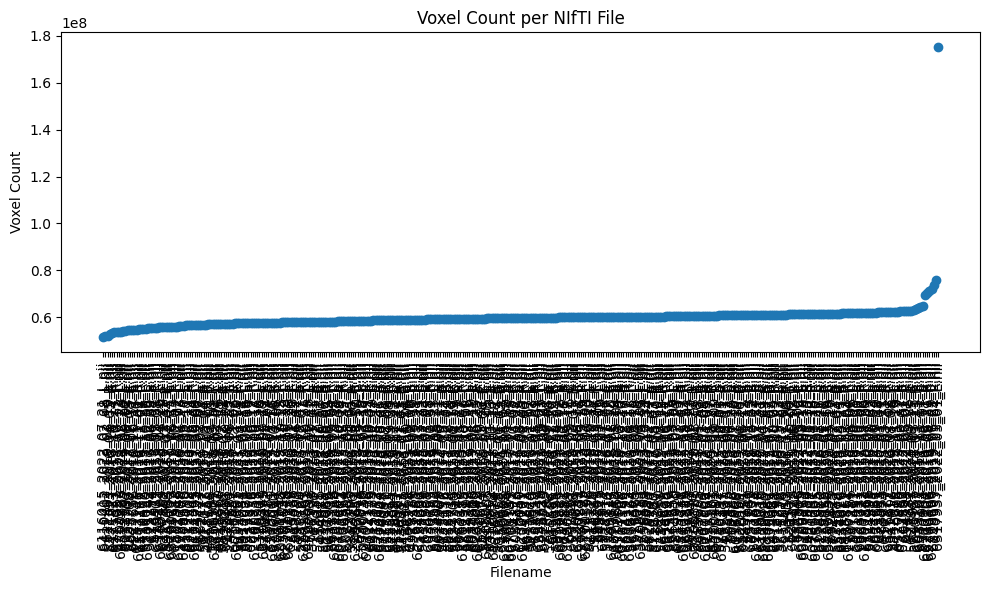

In [3]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Voxel Count')

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['Filename'], df_sorted['Voxel Count'])
plt.xticks(rotation=90)
plt.xlabel('Filename')
plt.ylabel('Voxel Count')
plt.title('Voxel Count per NIfTI File')
plt.tight_layout()
plt.show()